# Simple interactive widget demo

https://raw.githubusercontent.com/tirthajyoti/Widgets/master/Curve_fit_widget_1.ipynb

In [1]:
# ! pip install matplotlib scipy ipywidgets
# ! jupyter nbextension enable --py widgetsnbextension --sys-prefix venv
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

from scipy.optimize import curve_fit as cf

### Variables

In [2]:
N_samples = 25
x=np.linspace(-2,2,N_samples)

### Function definitions (ideal fitting function and actual data generating function with noise)

In [3]:
def f(x,a,mu,sigma):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    return (r)

In [4]:
def func(amplitude,ideal_mu,ideal_sigma,noise_sd,noise_mean):
    r=amplitude*np.exp(-(x-ideal_mu)**2/(2*ideal_sigma**2))
    plt.figure(figsize=(8,5))
    plt.plot(x,r,c='k',lw=3)
    r= r+np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    plt.scatter(x,r,edgecolors='k',c='yellow',s=60)
    plt.grid(True)
    plt.show()
    return (r)

### Call the 'interactive' widget with the data generating function, which also plots the data real-time
** Play with the *'noise_sd'* and *'noise_mean'* parameters to see how they impact the estimation (curve-fit) accuracy **

In [7]:
y=interactive(func,amplitude=[1,2,3,4,5],ideal_mu=(-5,5,0.5),
              ideal_sigma=(0,2,0.2),
              noise_sd=(0,1,0.1),noise_mean=(-1,1,0.2))
display(y)

interactive(children=(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0.0, description='ideal_mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value=1.0, description='ideal_sigma', max=2.0, step=0.2), FloatSlider(value=0.0, description='noise_sd', max=1.0), FloatSlider(value=0.0, description='noise_mean', max=1.0, min=-1.0, step=0.2), Output()), _dom_classes=('widget-interact',))

### Run curve-fitting optimizer to estimate parameters, store, and plot

/home/ivan/pybr/AJNA_MOD/venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


           Original Params  Estimated Params
Amplitude              1.0      1.000000e+00
Mean                   0.0      2.295673e-09
Std.Dev                0.0      1.000000e+00


/home/ivan/pybr/AJNA_MOD/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ivan/pybr/AJNA_MOD/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


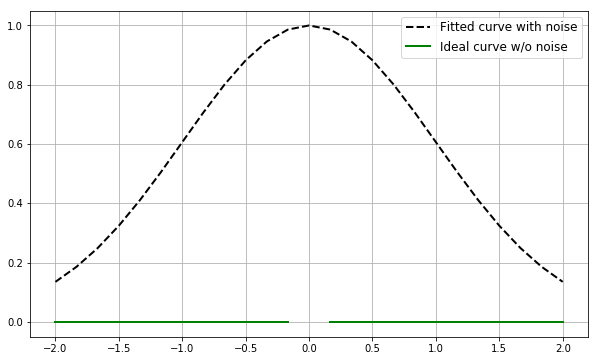

In [6]:
# Curve-fit optimizer
p = y.result
p1,_=cf(f,xdata=x,ydata=p)
par_lst=list(p1)

# Gather ideal parameters from the interactive widget object
p2=list(y.kwargs.values())
p3=p2[0:3]

# Make the data matrix
data = np.array([p3,par_lst])

# Put it in a Data Frame
df=pd.DataFrame(data=data.T,index=['Amplitude','Mean','Std.Dev'],columns=['Original Params','Estimated Params'])
print(df)

# Plot the ideal and estimated curves
plt.figure(figsize=(10,6))
plt.plot(x,f(x,par_lst[0],par_lst[1],par_lst[2]),'k--',lw=2)
plt.plot(x,f(x,p3[0],p3[1],p3[2]),c='green',lw=2)
plt.legend(['Fitted curve with noise','Ideal curve w/o noise'],fontsize=12)
plt.grid(True)
plt.show()